## Ley de grandes números y teorema del límite central

Si uno tiene que proporcionar una lista de los teoremas importantes y útiles en la teoría de la probabilidad, se debe mencionar la Ley de los Grandes Números y el Teorema del Límite Central. La mayoría de los libros de texto dan axiomas de probabilidad en sus primeros capítulos para proporcionar un terreno común para construir el sentido de probabilidad, sin embargo, esperarán capítulos bastante posteriores para presentar estos dos teoremas muy útiles.

El Teorema del Límite Central (CLT) es uno de los teoremas más asombrosos que tiene aplicaciones en estadística, teoría de la información y procesamiento de señales, aunque es un poco  intuitivo. Sin embargo, esto no disminuye su valor y contribución. Comprender CLT es crucial para conocer la razón por la cual la distribución Normal es tan omnipresente en muchas áreas de las matemáticas y ciencia de la computación.

Por el contrario, la Ley de los Grandes Números parece más fácil de entender y razonar. Aquí se presentará LLN y CLT, y una serie de experimentos para mostrar que CLT en realidad es válido para varias distribuciones diferentes, usando distribuciones numpy incorporadas.

### Ley de los grandes números

La ley de los Grandes Números establece que:

$$\overline{X_n} \rightarrow \frac{1}{n}(X_1 +X_2 + \dots + X_n)$$

El promedio de la muestra $X_n$ converge al valor esperado cuando el tamaño de la muestra tiende al infinito: $\overline{X_n} \rightarrow \mu$ cuando $n \rightarrow \infty$.


De manera formal, si asumimos que $X_1, X_2, \dots, X_n$ son variables aleatoriasindependientes e idénticamente distribuidas con media $\mu$. Sea $\overline{X_n}$ que representa el promedio de $n$ variables. Entonces, para algún $\epsilon \geq 0$, el resultado se cumple:

$$\lim_{n \rightarrow \infty}P(\vert \overline{X_n}- \mu \vert \leq \epsilon) = 1$$

Intuitivamente, esto tiene  sentido. Cuando se lanza una moneda normal, la media de las monedas (1 y 0) será de 0.5 a medida que aumente el número de lanzamiento. Para un pequeño número de pruebas, las observaciones pueden no ser compatibles con el valor esperado (para el caso límite, cuando la observación es 1, la diferencia es en realidad más grande).

Enfoques frecuentistas e incluso la definición o razonamientos sobre la probabilidad de algún evento tiene conexiones con la Ley de Grandes Números. Cuando uno tiene una moneda y quiere representar el evento de obtener cara o sello en variables aleatorias, en realidad no sabe si 10 caras pasarán de 20 intentos. Lo que se  sabe es que para una gran cantidad de pruebas, se van a conseguir caras y sellos en un número igual entre sí o al menos muy cerca para obtener una moneda sin sesgo.

En pocas palabras, el promedio de (muchas) muestras independientes  convergerá a la media de la distribución subyacente de la que se tomaron muestras de las observaciones.

Para mostrar que LLN se cumple, se puede analizar el promedio de las muestras frente al tamaño de las muestras. A medida que aumenta el tamaño de las muestras, el promedio converge al promedio de distribución.  Para una variable de Poisson, la media de distribución vs el promedio de las muestras se puede ver en el siguiente gráfico.


In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt

Paleta_COLOR= [    
               "#CE1404",
               "#A60628",
               "#7A68A6",
               "#467821",
               "#CF4457",
               "#188487",
               "#E24A33"
              ]

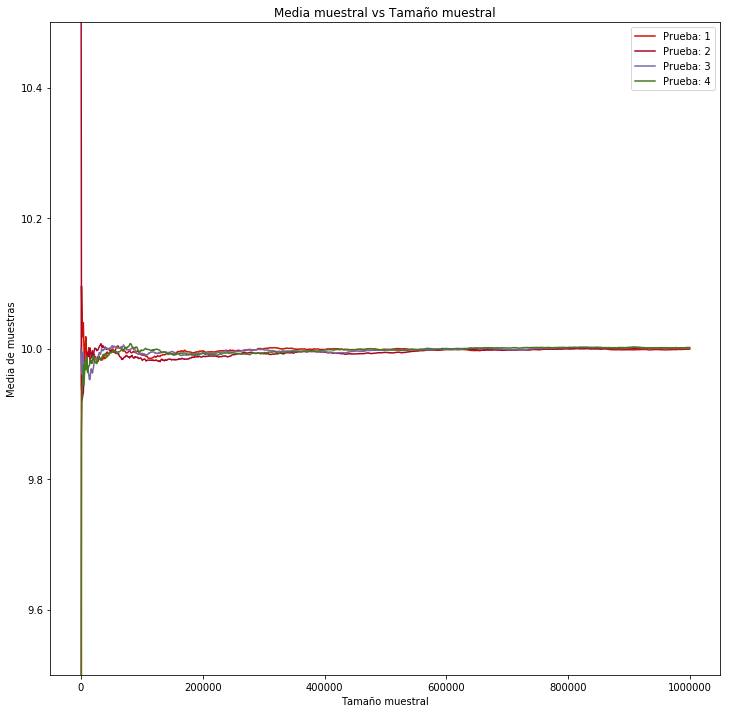

In [2]:
def dibujo_promedio_de_observaciones_vs_media(func=np.random.poisson, tam_muestral=1000000, media_=10):
    plt.figure(figsize=(12, 12))
    plantilla_prueba = 'Prueba: {}'.format
    for ii in range(len(Paleta_COLOR)//2 + 1):
        muestras = func(media_, size=tam_muestral)
        promedio = [muestras[:jj].mean() for jj in range(1, tam_muestral, 1000)]
        plt.plot(range(1, tam_muestral, 1000), promedio, lw=1.5, label=plantilla_prueba(ii + 1), c=Paleta_COLOR[ii])
    
    plt.title('Media muestral vs Tamaño muestral');
    plt.ylabel('Media de muestras');
    plt.xlabel('Tamaño muestral');
    plt.ylim([9.5, 10.5]);
    plt.legend();
dibujo_promedio_de_observaciones_vs_media()

En el gráfico anterior, pudimos ver que la media de las muestras es bastante diferente de la media real para un pequeño número de muestras. A medida que crece el tamaño de la muestra, el promedio de las muestras convergerá a la media de la distribución muestral que es 10. Esto también se aplica a otras distribuciones de probabilidad.

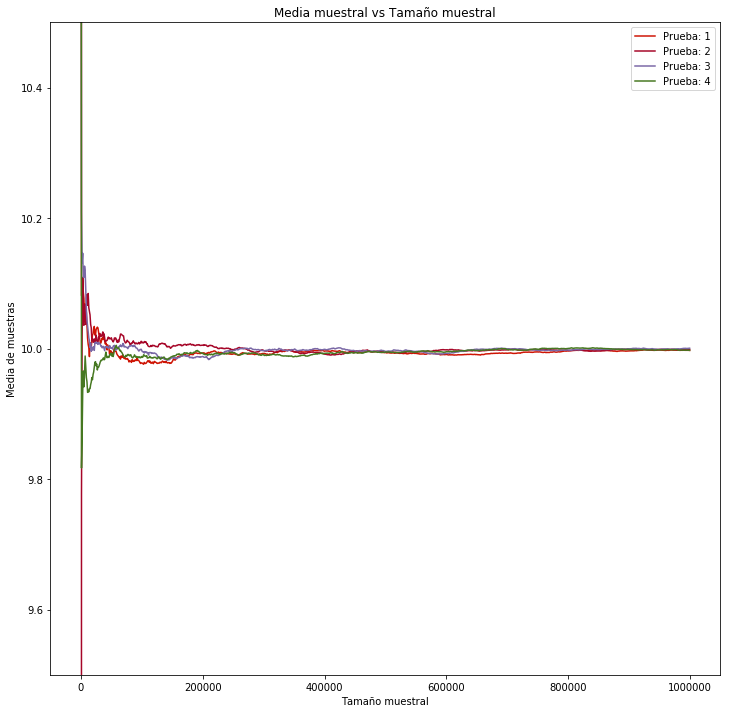

In [3]:
dibujo_promedio_de_observaciones_vs_media(func=np.random.chisquare)

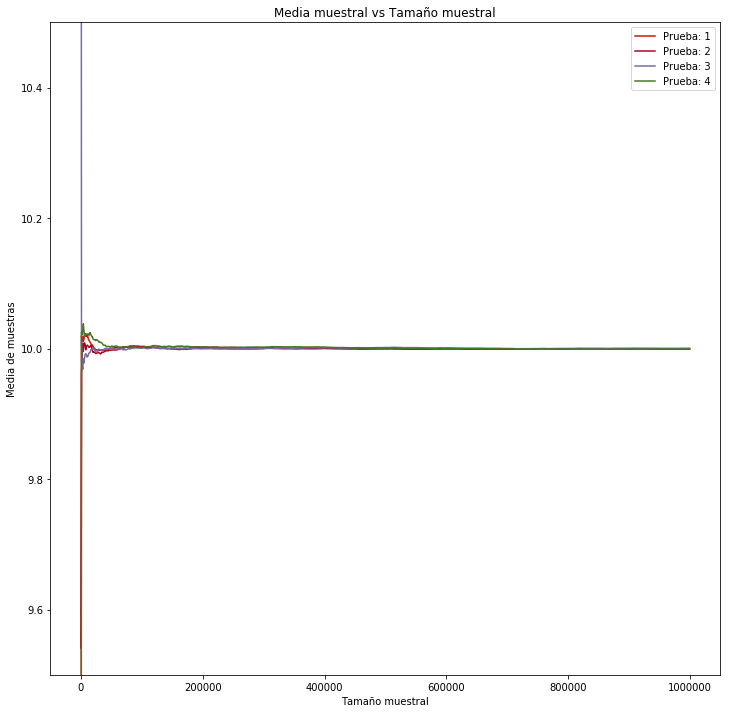

In [4]:
dibujo_promedio_de_observaciones_vs_media(func=np.random.normal)

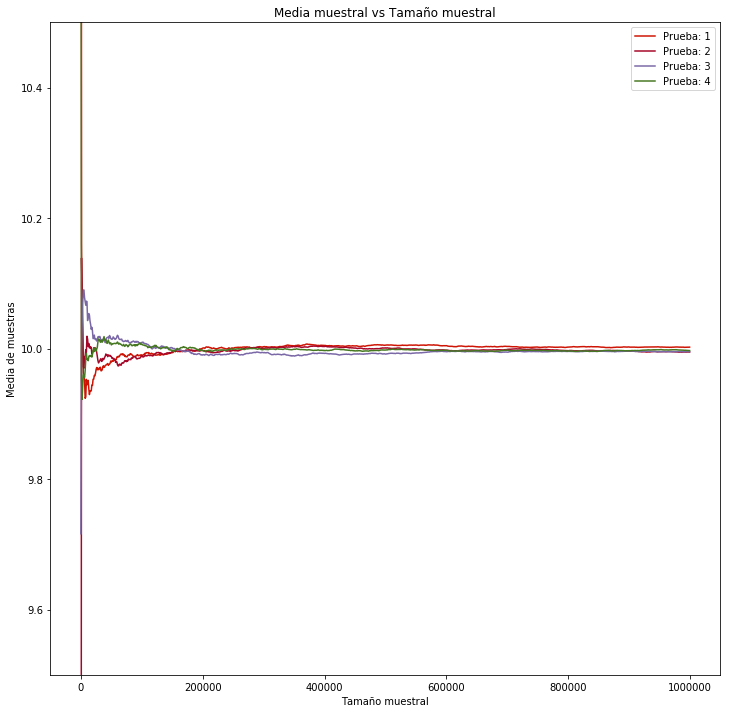

In [5]:
dibujo_promedio_de_observaciones_vs_media(func=np.random.gamma)

Eso se ve muy bien!, nuestra intuición parece ser correcta para las variables aleatorias de Poisson, Chi cuadrado, Normal y Gamma. Echemos un vistazo a CLT

### Teorema del Límite Central

Si usamos la misma notación que usamos para el LLN, entonces la ecuación para CLT puede ser escrita como sigue:

$$\frac{\sqrt{n}}{\sigma}(\overline{X_n} - \mu) \rightarrow N(0,1)$$

Cuando

$$n \rightarrow \infty$$

Como el tamaño de la muestra va al infinito, la distribución media muestral convergerá a una distribución normal. El concepto de convergencia de distribución es bastante importante ya que no se trata de una métrica única a diferencia de la convergencia media, sino la distribución de medias de muchas pruebas será normal, incluso si las distribuciones de cada prueba no son normales.

El teorema del Límite Central en pocas palabras dice que las características medias de la distribución muestral que tienen medidas de media y varianza bien definidas serán iguales a:

* La media de la distribución media muestral es la media de la población de la que se extrajeron las muestras. Debes tener en cuenta que la distribución muestral puede no parecerse una distribución normal.

* La varianza de la distribución muestral es la varianza de la población en que las muestras se extraen sobre el número de muestras.

* Incluso si la población no  parece una distribución normal, la distribución media muestral se aproximará a la normal. (Difícil de creer, la distribución  de la media muestral será normal, para un tamaño de muestra lo suficientemente grande).

* Cuando agrega más observaciones, la similitud entre la distribución media muestrak con una distribución normal aumentará. Como el tamaño de muestreo irá al infinito, la distribución se convierte en una distribución normal (el término de error va a cero).

### Ruido vs. ruido normal o Gaussiano

CLT es también la razón principal por la que generalmente se supone que el ruido es gaussiano. Esto se debe a que, si el proceso al que nos referimos tiene variables aleatorias que se muestrean desde diferentes distribuciones y si estas variables aleatorias llevan ruidos diferentes, entonces a medida que aumenta el número de observaciones, el error (suma de todas las el ruido de las variables aleatorias) comienza a parecerse a una distribución normal. 

Aunque no tenemos idea de cuántas variables aleatorias hay en la señal observada o de qué distribuciones de muestreo provienen, la suposición de ruido de Gauss es bastante buena debido al CLT. Esta es una de las principales razones por las que la distribución normal es tan ubicua en el procesamiento de señales para modelar el ruido.

Cuando restas la media y divides por desviación estándar, tus puntos de datos, si tus datos también son Gaussianos, entonces lo que conseguirás es el término correcto en la ecuación anterior para el CLT.

Si se quiere ver una distribución diferente y cómo encajar en una distribución gaussiana, se verá que a medida que crece la cantidad de muestras, las distribuciones comenzarán a parecerse a una distribución normal. El teorema sin embargo es sorprendente cierto para una gran cantidad de muestras.

In [6]:
gumbel = lambda k: np.random.gumbel(1.5, 3.0, [100000, k])[:,:].mean(1)
poisson = lambda k: np.random.poisson(5, [100000, k])[:,:].mean(1)
pareto = lambda k: np.random.pareto(5, [10000, k])[:,:].mean(1)

def dibuja_y_fija_distribucion_gaussiana(func, tam_muestral, intervalos=np.linspace(-5, 20, 100)):
    """ Dibujamos la distribución muestral y ajustamos una normal
        en la parte superior de la distribución para ver si el CLT es verdadero
    """
    muestras = func(tam_muestral)
    mu = muestras.mean()
    sigma = muestras.std()
    a = muestras.size * (intervalos[1] - intervalos[0])
    plt.hist(muestras, intervalos, color=Paleta_COLOR[2]);
    plt.hold(True)
    plt.plot(intervalos, a / (np.sqrt(2 * np.pi) * sigma) * np.exp( - (intervalos - mu) ** 2 / (2 * sigma ** 2)), 
             c=Paleta_COLOR[0], ls='--')
    plt.grid(False);
    plt.yticks([]);


### Experimentos de la distribución de Pareto

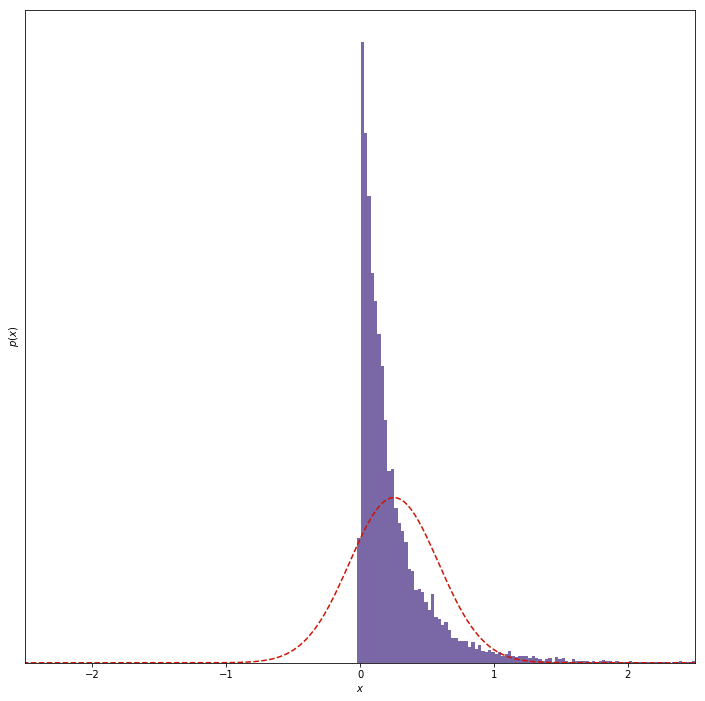

In [7]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(pareto, 1, intervalos=np.linspace(-5, 20, 1000));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');
plt.xlim([-2.5, 2.5]);

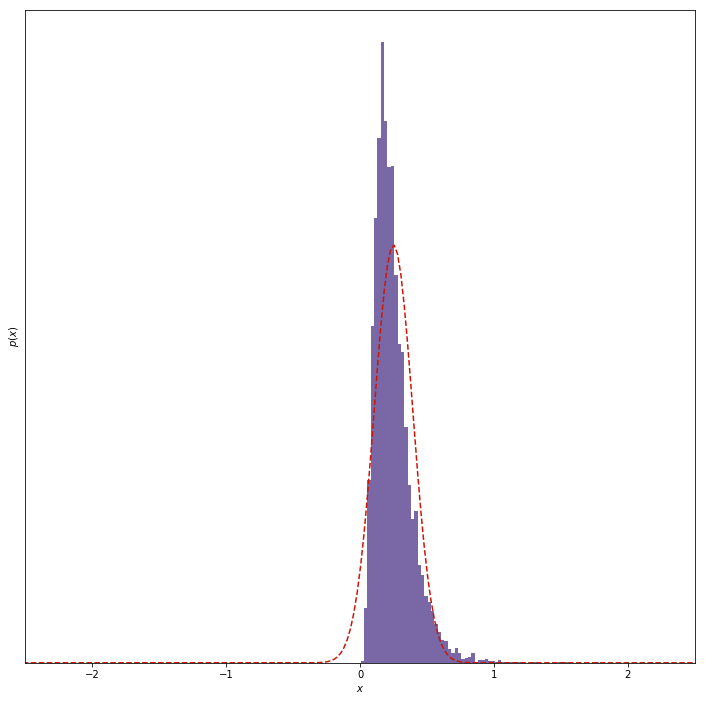

In [8]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(pareto, 5, intervalos=np.linspace(-5, 20, 1000));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');
plt.xlim([-2.5, 2.5]);

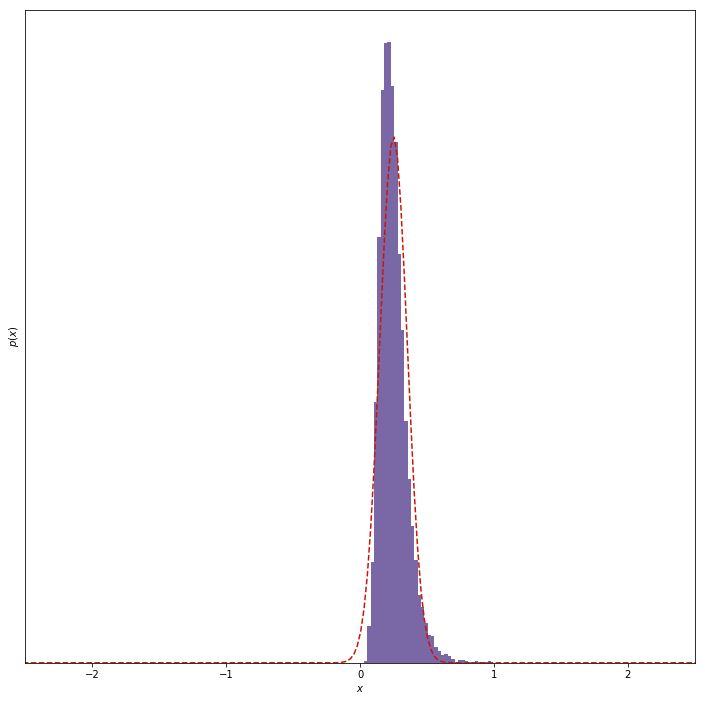

In [9]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(pareto, 10, intervalos=np.linspace(-5, 20, 1000));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');
plt.xlim([-2.5, 2.5]);

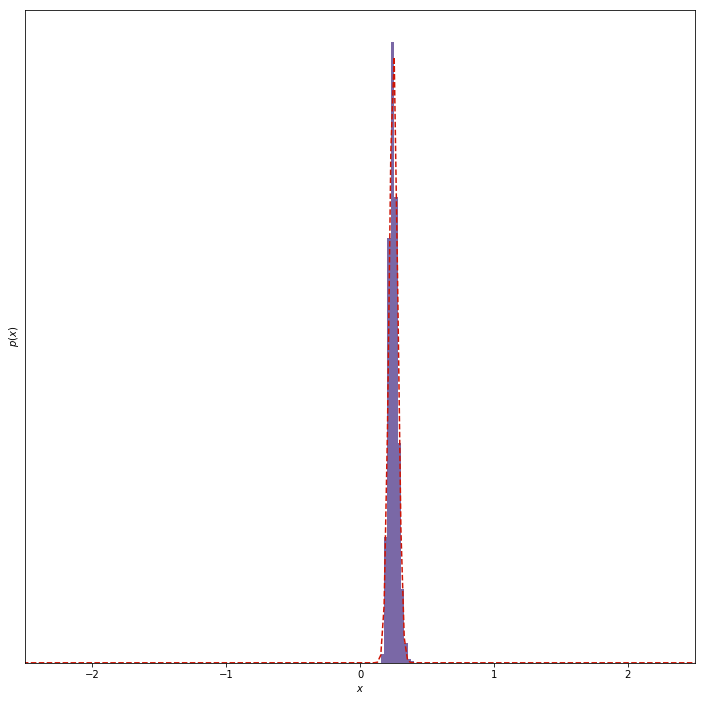

In [10]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(pareto, 100, intervalos=np.linspace(-5, 20, 1000));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');
plt.xlim([-2.5, 2.5]);

### Experimentos de la distribución de Poisson

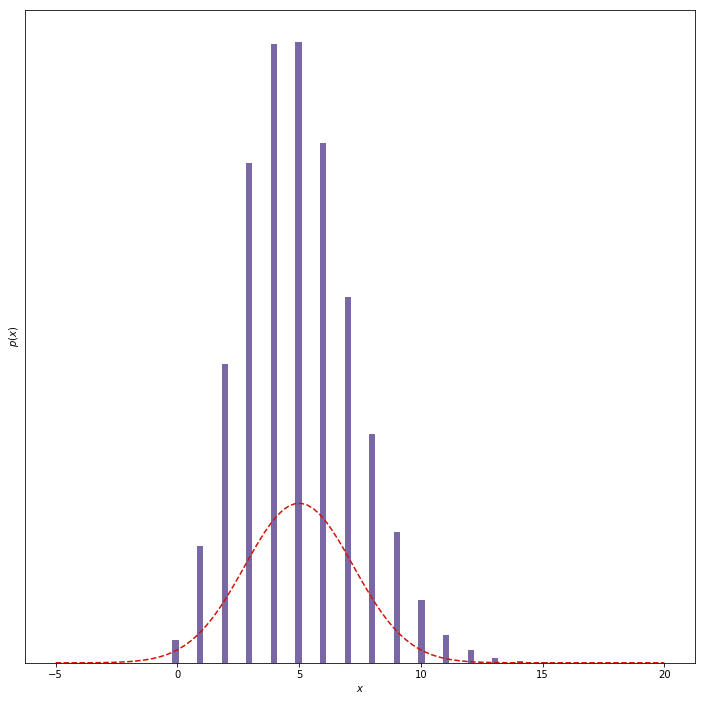

In [11]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(poisson, 1, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

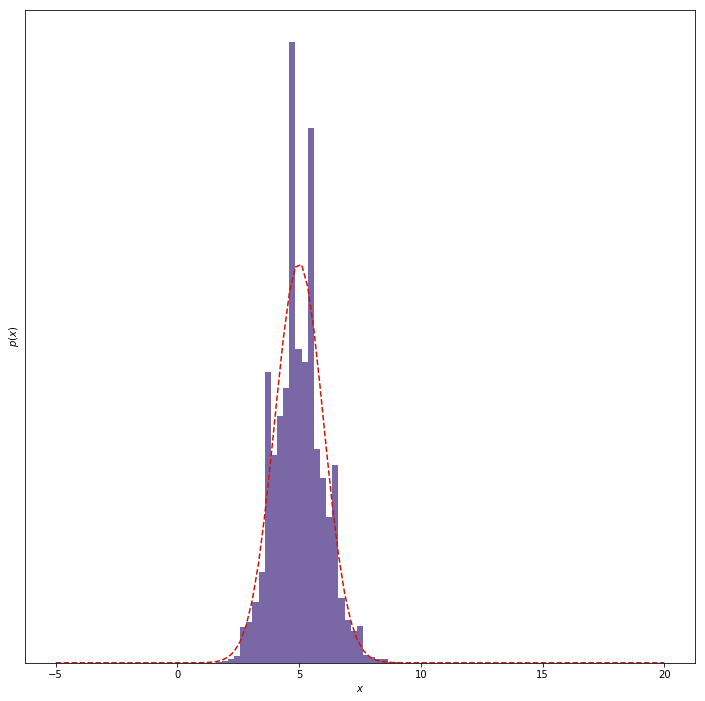

In [12]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(poisson, 5, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

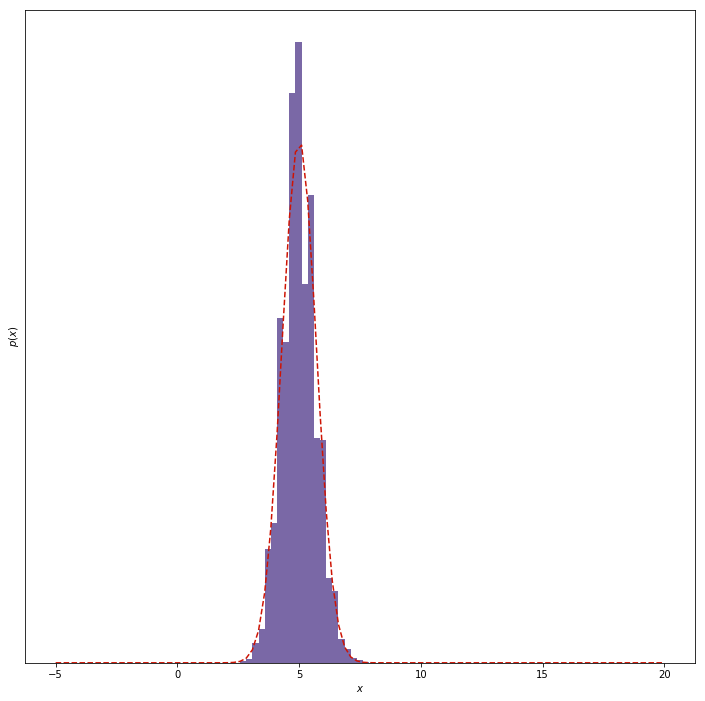

In [13]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(poisson, 10, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

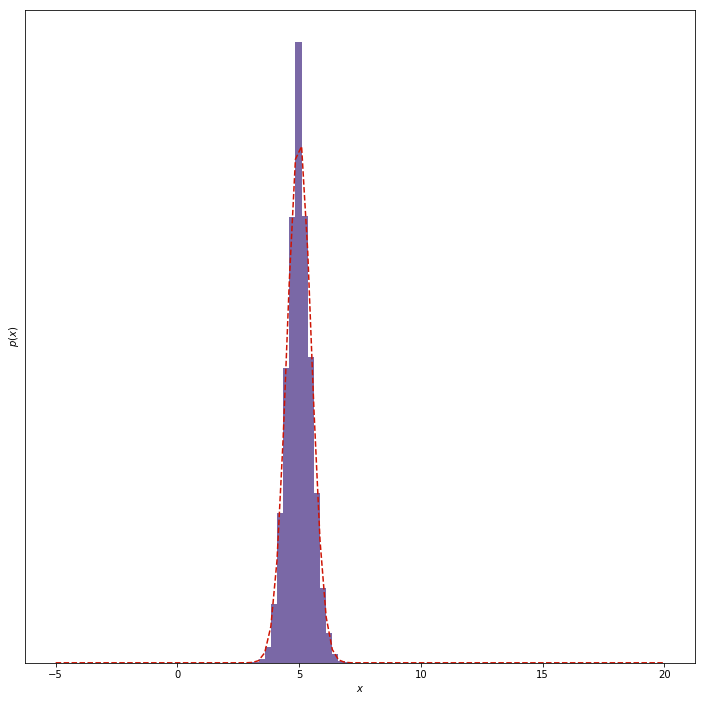

In [14]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(poisson, 20, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

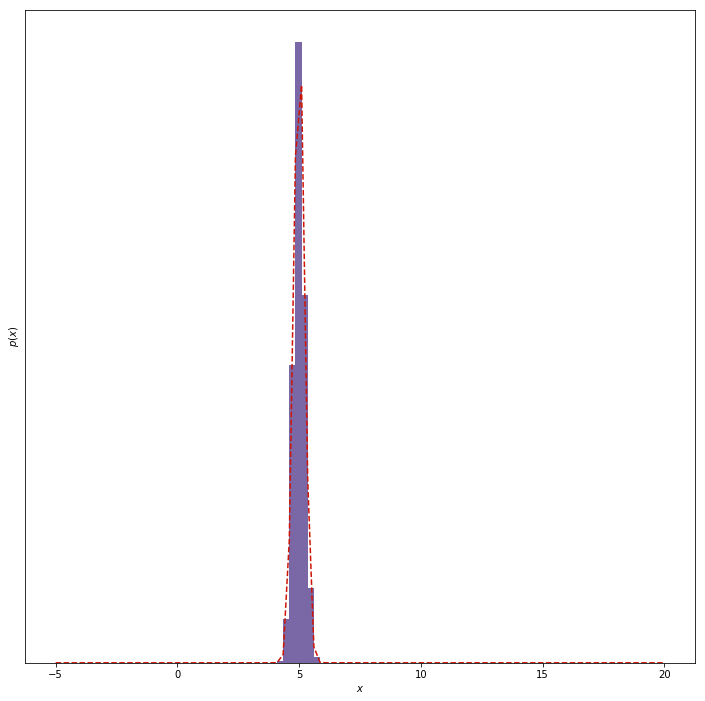

In [15]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(poisson, 100, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

### Experimentos de la distribución Gumbel

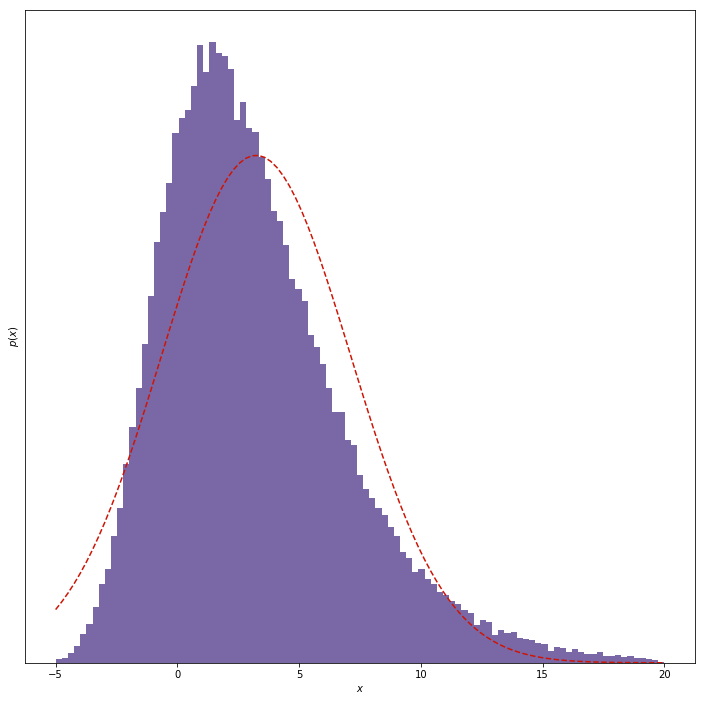

In [16]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 1, intervalos=np.linspace(-5, 20, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

Solo con 1 muestra, no obtendríamos mucha suerte en términos de cuánto se parece la distribución a una distribución normal, pero el gráfico es importante para mostrar de dónde comenzamos.

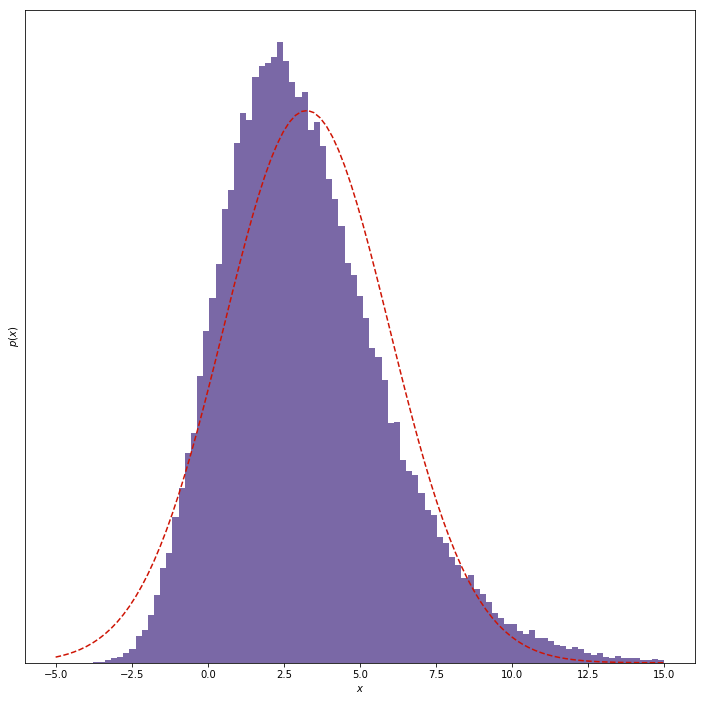

In [17]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 2, intervalos=np.linspace(-5, 15, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

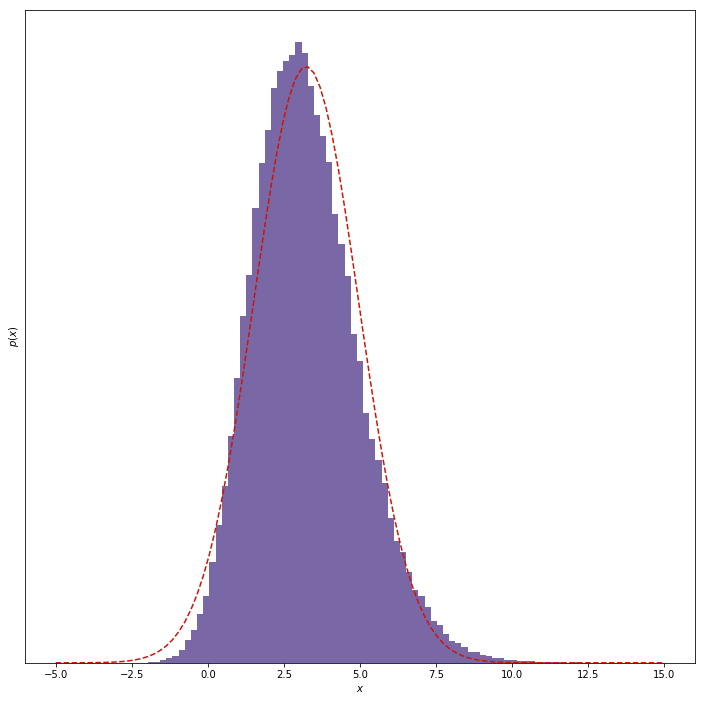

In [18]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 5, intervalos=np.linspace(-5, 15, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

En el momento en que llegamos a 20 muestras, la distribución es casi imposible de distinguir de un normal.

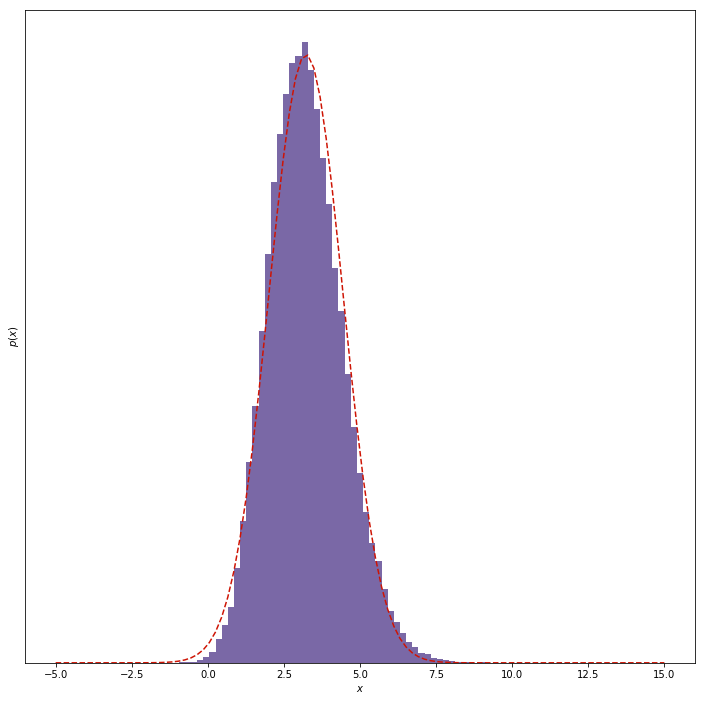

In [19]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 10, intervalos=np.linspace(-5, 15, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

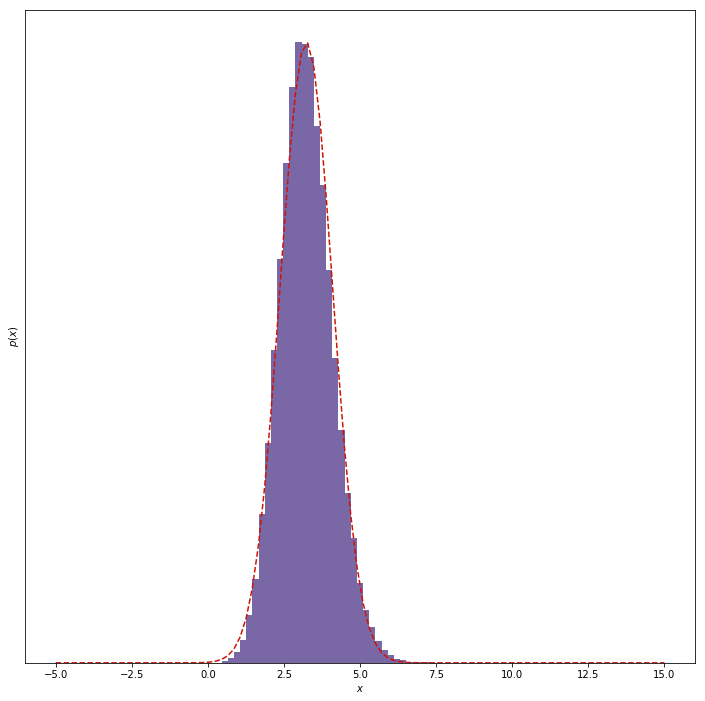

In [20]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 20, intervalos=np.linspace(-5, 15, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

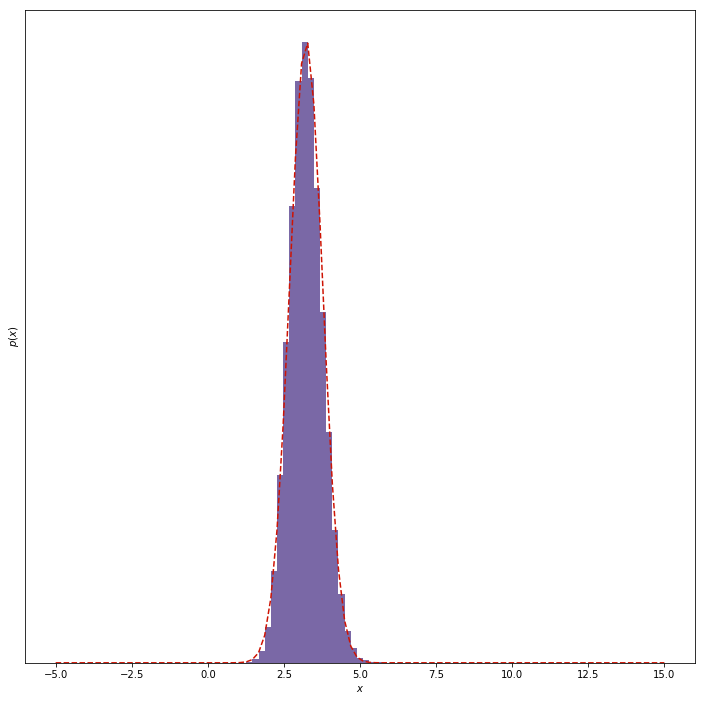

In [21]:
plt.figure(figsize=(12, 12));
dibuja_y_fija_distribucion_gaussiana(gumbel, 50, intervalos=np.linspace(-5, 15, 100));
plt.xlabel(r'$x$');
plt.ylabel(r'$p(x)$');

A medida que aumenta el tamaño de la muestra, la distribución muestral  se verá como una distribución gaussiana.

### A tomar en cuenta


* La Ley de los Grandes Números y el Teorema del Límite Central son subestimados en estadística, ambos son agradables, CLT  es bastante poderoso.

* El número de caras en el lanzamiento de monedas (histograma) después de que un gran número de lazamientos se ve como una distribución normal debido al CLT. Se debe tener en cuenta que la moneda no tiene que ser justa.
    
* Si la distribución normal es tan popular y omnipresente en diferentes campos como estadística, machine learning, teoría de la información y procesamiento de señales se debe parcialmente a CLT.
   
* CLT dice que con un  muestra grande, la media de la muestra comenzará a parecerse a la media de la población. La distribución muestral de la media será una distribución normal.